# Machine learning predictions

In [1]:
import pandas as pd

df = pd.read_csv('data_connected.csv')

C:\Users\rafal\AppData\Local\Temp/ipykernel_11672/3154285212.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_connected.csv')


## Extraxting day of week number

In [2]:
from datetime import datetime, date
day_of_week = []
for i in df["Incident Date"]:
    day_of_week.append(pd.to_datetime(i).day_of_week)

df["day_of_week"] = day_of_week

## Encoding highway (road_type)

In [3]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(df[["highway"]])
df[["highway"]] = enc.transform(df[["highway"]])

## Extractind hour

In [4]:
hour = []
for i in df["Alarm DtTm"]:
    hour.append(pd.to_datetime(i).hour)
    
df["hour"] = hour

In [5]:
df

,osmid,name,geometry,highway,index_right,field_1,Incident Number,Exposure Number,ID,Address,...,Estimated Property Loss,Estimated Contents Loss,Civilian Fatalities,Civilian Injuries,Number of Alarms,Supervisor District,neighborhood_district,point,day_of_week,hour
0,5004035,Macondray Lane,LINESTRING (4234824.324376223 15125003.9341347...,5.0,524687,527430,20066314,0,200663140,MACONDRAY LANE,...,6782.093746,2267.703959,0,0,1,6.142039,Russian Hill,POINT (-122.417315 37.798941),6,18
1,5071582,James Lick Freeway,LINESTRING (4228939.307599111 15133689.2342982...,1.0,98619,98622,6036473,0,60364730,101sb C Chavez,...,0.000000,0.000000,0,0,1,10.000000,Visitacion Valley,POINT (-122.398673 37.71694),4,6
2,5071582,James Lick Freeway,LINESTRING (4228939.307599111 15133689.2342982...,1.0,408379,410313,16089919,0,160899190,1 101NB BAYSHORE BL ON,...,6782.093746,2267.703959,0,0,1,10.000000,Visitacion Valley,POINT (-122.398673 37.71694),0,13
3,5071582,James Lick Freeway,LINESTRING (4228939.307599111 15133689.2342982...,1.0,180410,180460,9015577,0,90155770,1 101sb C Chavez On,...,6782.093746,2267.703959,0,0,1,10.000000,Visitacion Valley,POINT (-122.398673 37.71694),6,3
4,5071582,James Lick Freeway,LINESTRING (4228939.307599111 15133689.2342982...,1.0,531589,534370,20074015,0,200740150,1 101NB,...,6782.093746,2267.703959,0,0,1,10.000000,Visitacion Valley,POINT (-122.398673 37.71694),5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477881,1065847913,NaN,LINESTRING (4229559.309630014 15132523.5828647...,8.0,13338,13338,3037767,0,30377670,2660 Newhall St.,...,0.000000,0.000000,0,0,1,10.000000,Bayview Hunters Point,POINT (-122.39963625 37.72721219),0,11
477882,1065847913,NaN,LINESTRING (4229559.309630014 15132523.5828647...,8.0,46122,46122,4045888,0,40458880,2660 Newhall St.,...,0.000000,0.000000,0,0,1,10.000000,Bayview Hunters Point,POINT (-122.39963625 37.72721219),4,20
477883,1065847913,NaN,LINESTRING (4229559.309630014 15132523.5828647...,8.0,23192,23192,3070654,0,30706540,2660 Newhall St.,...,0.000000,0.000000,0,0,1,10.000000,Bayview Hunters Point,POINT (-122.39963625 37.72721219),3,16
477884,1065847913,NaN,LINESTRING (4229559.309630014 15132523.5828647...,8.0,54709,54709,4069400,0,40694000,2660 Newhall St.,...,0.000000,0.000000,0,0,1,10.000000,Bayview Hunters Point,POINT (-122.39963625 37.72721219),0,20


In [6]:
df["highway"].unique()

array([ 5.,  1.,  9.,  8.,  6.,  3.,  2.,  4., 13., 12., 11.,  7.,  0.,
       10.])

# Preparing data to ML predictions

## Creating list of possible permutations using highway (road_type), day_of_week and hour

In [7]:
import itertools
a = df["highway"].unique().tolist()
b = df["day_of_week"].unique().tolist()
c = df["hour"].unique().tolist()
s=[a, b, c]
s = list(itertools.product(*s))
len(s)

2352

## Calculating target for each permutation 
### target = (incidents count in particular highway (road_type), day_of_week and hour) / (incidents count)

In [8]:
target = []
for i in range(len(s)):
    target.append(len(df.loc[(df['highway'] == s[i][0]) & (df['day_of_week'] == s[i][1])  & (df['day_of_week'] == s[i][2])])/len(df))

## Creating final data frame

In [9]:
data_to_machine_learning = {'road_type': [i[0] for i in s], 'day_of_week': [i[1] for i in s], 'hour': [i[2] for i in s], 'target': target}
data_to_machine_learning =  pd.DataFrame(data=data_to_machine_learning)
data_to_machine_learning

,road_type,day_of_week,hour,target
0,5.0,6,18,0.000000
1,5.0,6,6,0.025747
2,5.0,6,13,0.000000
3,5.0,6,3,0.000000
4,5.0,6,12,0.000000
...,...,...,...,...
2347,10.0,1,23,0.000000
2348,10.0,1,22,0.000000
2349,10.0,1,19,0.000000
2350,10.0,1,16,0.000000


# Machine learning models

In [10]:
X = data_to_machine_learning[["road_type", "day_of_week", "hour"]]
y = data_to_machine_learning.target

## Data split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

reg = LinearRegression().fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print(mse)
print(reg.score(X_test, y_test))
reg.predict(np.array([[8.0, 6, 15]]))

7.963887329275847e-06
-0.0003465096875019391


c:\users\rafal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.00030086])

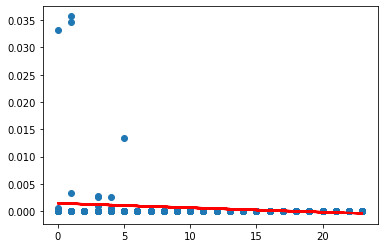

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X_test['hour'], y_test)
plt.plot(X_test['hour'], reg.predict(X_test), color="red", linewidth=1)

## KNeighbors regressor n_neighbors=2

In [38]:
import sklearn.neighbors
import numpy as np
import sklearn.metrics as metrics
knn_2_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
knn_2_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, knn_2_reg.predict(X_test))
print(mse)
print(knn_2_reg.score(X_test, y_test))
knn_2_reg.predict(np.array([[8.0, 4, 23]]))

1.1611468809293238e-05
-0.45852042042613594


c:\users\rafal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([0.])

## KNeighbors regressor n_neighbors=5

In [39]:
import sklearn.neighbors
knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_5_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, knn_5_reg.predict(X_test))
print(mse)
print(knn_5_reg.score(X_test, y_test))
knn_5_reg.predict(np.array([[8.0, 4, 23]]))

1.1180273327496935e-05
-0.4043578139786168


c:\users\rafal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([0.])

## Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_2_reg = PolynomialFeatures(degree = 3) # our polynomial model is of order
X_poly = poly_2_reg.fit_transform(X_train) # transforms the features to the polynomial form
lin_reg_2 = LinearRegression() # creates a linear regression object
lin_reg_2.fit(X_poly, y_train)

mse = metrics.mean_squared_error(y_test, lin_reg_2.predict(poly_2_reg.fit_transform(X_test)))
print(mse)
lin_reg_2.predict(poly_2_reg.fit_transform(np.array([[8.0, 6, 23]])))

7.576435049989845e-06


array([-0.00060809])

# We decidet to reject KNeighors regressors because the predictions are often 0
# We think that the best option is Linear regression because predictions are almost reasonable